# WeatherPy

Observed Trends:
- Temperatures appear to reach the highest near 20 degrees latitude.
- Temperatures are higher at latitudes closer to the equator. Temperatures are lower towards the earth's poles.
- The datasets for cloudiness and wind speed show some outliers, but overall don't seem to have any correlation to latitude, or proximity to the equator.



In [1]:
#dependencies
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import random
from config import api_key
from citipy import citipy
from ratelimiter import RateLimiter
from datetime import datetime

In [2]:
#Generate random lat/lon coordinates
counter = 0
rndlat=[]
rndlon=[]

while len(rndlat) < 750:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1
 

geo_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
geo_df.head()

,lat,lon
0,-73.040048,-65.644851
1,-89.747432,-5.013930
2,-49.499704,-169.067310
3,-49.356038,117.842650
4,-25.803954,148.763202


In [3]:
#feed data to citipy
city = []
country = []


for index, row in geo_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
city_df.head()

,city,country
0,ushuaia,ar
1,hermanus,za
2,vaini,to
3,albany,au
4,roma,au


In [4]:
weather_data=[]

In [5]:
#make API calls and collect data
base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="
rate_limiter = RateLimiter(max_calls=50, period=60)

for index, row in city_df.iterrows():
    with rate_limiter:
        city_q=row["city"]
        response = requests.get(query_url + city_q).json()
        record_counter=1
        try:
            temp=response["main"]["temp"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Processing record #{record_counter} -- {city_q}")
            print (f'{base_url}appid=***masked***&units={units}&q={city_q}')
            print ("----------------------------------------------------------------")
            record_counter +=1
        except:
            print (f"Weather for {city_q} not found.")
            print ("----------------------------------------------------------------")
            continue
 
   

Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
----------------------------------------------------------------
Processing record #1 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vaini
----------------------------------------------------------------
Processing record #1 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Processing record #1 -- roma
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=roma
----------------------------------------------------------------
Weather for marcona not found.
---------------------------------------

Processing record #1 -- bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bredasdorp
----------------------------------------------------------------
Processing record #1 -- nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nikolskoye
----------------------------------------------------------------
Processing record #1 -- arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=arraial do cabo
----------------------------------------------------------------
Weather for olafsvik not found.
----------------------------------------------------------------
Processing record #1 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Processing record #1 -- rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=impe

Processing record #1 -- thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=thinadhoo
----------------------------------------------------------------
Processing record #1 -- bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bambous virieux
----------------------------------------------------------------
Processing record #1 -- bani walid
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bani walid
----------------------------------------------------------------
Processing record #1 -- majene
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=majene
----------------------------------------------------------------
Processing record #1 -- hilo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hilo
----------------------------------------------------------------
Processing record #1 -- nikolskoye
http://

Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tuatapere
----------------------------------------------------------------
Processing record #1 -- baft
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=baft
----------------------------------------------------------------
Processing record #1 -- caborca
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=caborca
----------------------------------------------------------------
Processing record #1 -- nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nikolskoye
----------------------------------------------------------------
Weather for taolanaro not found.
-----------------------

Processing record #1 -- ordzhonikidze
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ordzhonikidze
----------------------------------------------------------------
Processing record #1 -- margate
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=margate
----------------------------------------------------------------
Processing record #1 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jamestown
----------------------------------------------------------------
Processing record #1 -- faanui
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=faanui
----------------------------------------------------------------
Processing record #1 -- lata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lata
----------------------------------------------------------------
Processing record #1 -- reyes
http://api.openweather

Processing record #1 -- saint george
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint george
----------------------------------------------------------------
Processing record #1 -- new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=new norfolk
----------------------------------------------------------------
Processing record #1 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vaini
----------------------------------------------------------------
Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #1 -- saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint-philippe
----------------------------------------------------------------
Processing record #1 -- tevaitoa

Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayora
----------------------------------------------------------------
Processing record #1 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #1 -- bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bredasdorp
----------------------------------------------------------------
Processing record #1 -- cape town
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cape town
----------------------------------------------------------------
Processing record #1 -- beringovskiy

Processing record #1 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port alfred
----------------------------------------------------------------
Processing record #1 -- biltine
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=biltine
----------------------------------------------------------------
Processing record #1 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Processing record #1 -- longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=longyearbyen
----------------------------------------------------------------
Processing record #1 -- barrow
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=barrow
----------------------------------------------------------------
Weather for meyungs not found.
---

Processing record #1 -- yumen
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=yumen
----------------------------------------------------------------
Processing record #1 -- bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bredasdorp
----------------------------------------------------------------
Processing record #1 -- port blair
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port blair
----------------------------------------------------------------
Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mount gambier
----------------------------------------------------------------
Processing record #1 -- rikitea
http://a

Processing record #1 -- butaritari
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=butaritari
----------------------------------------------------------------
Processing record #1 -- new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=new norfolk
----------------------------------------------------------------
Processing record #1 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Processing record #1 -- bethel
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bethel
----------------------------------------------------------------
Processing record #1 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayora
----------------------------------------------------------------
Processing record #1 -- puro

Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #1 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Processing record #1 -- atuona
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=atuona
----------------------------------------------------------------
Processing record #1 -- okha
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=okha
----------------------------------------------------------------
Processing record #1 -- bermejo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bermejo
----------------------------------------------------------------
Processing record #1 -- agua branca
http://api.openweather

Processing record #1 -- martapura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=martapura
----------------------------------------------------------------
Processing record #1 -- sorland
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sorland
----------------------------------------------------------------
Processing record #1 -- nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nikolskoye
----------------------------------------------------------------
Processing record #1 -- klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=klaksvik
----------------------------------------------------------------
Processing record #1 -- kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kruisfontein
----------------------------------------------------------------
Processing record #1 -- bodo
http://ap

Processing record #1 -- teguldet
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=teguldet
----------------------------------------------------------------
Processing record #1 -- lompoc
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lompoc
----------------------------------------------------------------
Processing record #1 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Processing record #1 -- tutoia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tutoia
----------------------------------------------------------------
Processing record #1 -- kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kloulklubed
----------------------------------------------------------------
Processing record #1 -- torbay
http://api.openweatherm

Processing record #1 -- sitka
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sitka
----------------------------------------------------------------
Processing record #1 -- sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sao joao da barra
----------------------------------------------------------------
Processing record #1 -- qazvin
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=qazvin
----------------------------------------------------------------
Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #1 -- tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tasiilaq
----------------------------------------------------------------
Processing record #1 -- nhulunbuy
http://api

Processing record #1 -- dori
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=dori
----------------------------------------------------------------
Processing record #1 -- saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint-philippe
----------------------------------------------------------------
Processing record #1 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port alfred
----------------------------------------------------------------
Processing record #1 -- sobolevo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sobolevo
----------------------------------------------------------------
Processing record #1 -- olinda
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=olinda
----------------------------------------------------------------
Processing record #1 -- havelock
http://api.

Processing record #1 -- katsuura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=katsuura
----------------------------------------------------------------
Processing record #1 -- cape town
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cape town
----------------------------------------------------------------
Processing record #1 -- salinopolis
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=salinopolis
----------------------------------------------------------------
Processing record #1 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #1 -- chuy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chuy
----------------------------------------------------------------
Processing record #1 -- itatskiy
http://api.open

Processing record #1 -- torbay
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=torbay
----------------------------------------------------------------
Weather for illoqqortoormiut not found.
----------------------------------------------------------------
Processing record #1 -- nosy varika
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nosy varika
----------------------------------------------------------------
Processing record #1 -- ancud
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ancud
----------------------------------------------------------------
Processing record #1 -- tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tuatapere
----------------------------------------------------------------
Processing record #1 -- biak
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=biak
--------------------

In [6]:
#get count of cities with collected data
print (len(weather_data))

690


In [7]:
weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Country","Latitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Ushuaia,AR,-54.81,33.80,80,75,18.34
1,Hermanus,ZA,-34.42,36.75,90,0,2.15
2,Vaini,IN,15.34,68.61,98,92,3.49
3,Albany,US,42.65,72.66,53,90,5.82
4,Rome,IT,41.89,72.48,64,40,10.29


In [8]:
weather_df.to_csv("weather_data.csv")

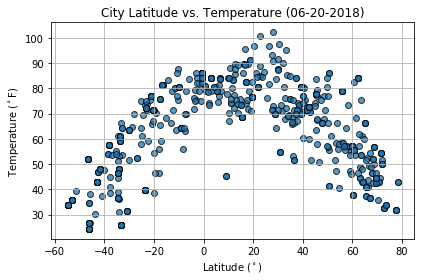

In [9]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("temp.png")
plt.show()

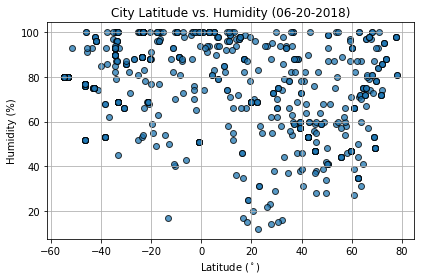

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("humidity.png")
plt.show()

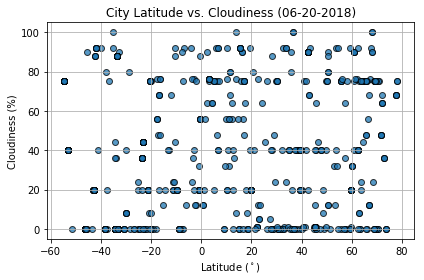

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clouds.png")
plt.show()

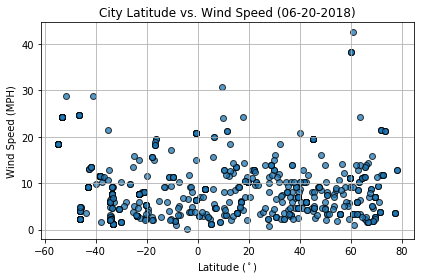

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("wind.png")
plt.show()